 


- *Umwiza, Soleil S.*
- *Student number: 4386019*
--------------------------------------

## Phase 1: Proposal



####  phishing Email

What Is Phishing Email? 

Phishing is a form of cyberattack where attackers attempt to trick individuals and organisations into revealing sensitive information, such as login credentials or financial details, by impersonating a trustworthy entity via electronic communication, typically email. The attacker often manipulates the victim’s emotions or uses a sense of urgency to achieve their goals.


## 🟡 Domain understanding



#### **What?**

*What is the main goal of this project?*

I want to implement a model that will detect phishing emails automatically without human intervention.



#### **Why**
*Why is this project important?*

With the development of technology, emails are widely used in business, professional, and social communication. Criminals also see this as an opportunity to steal people's money or access personal information and use them in their criminal activities.

Unfortunately, not everyone is able to recognize a phishing email just by looking at it. People are still being victims of phishing emails and other online criminalities. Because of this issue, having a system that will detect phishing emails and flag them will help users of emails recognize those unwanted emails and prevent the damage this can cause to email users.

#### **Who**
*Who will benefit from the results of this project?*

This model will benefit the following stakeholders:
 Companies/Institutions that use emails in their work or business will benefit from this system because it will protect their business and the data of their employees and clients
Normal users of email are the main target of phishing therefore will benefit from this system.
Email providers have the responsibility of protecting their client's data, therefore this system will be beneficial for them


#### **When**
*When will you deliver this projetc?*

For this project, I am using the Jira software as a tool for my planning and progress of increments. I create use stories to work on during a sprint and for each Sprint I set its goal. Below is the screenshot of my sprint.



This project will consist of 2 iterations of challenge 1. The masterpiece challenge will be delivered on the 26th of November.

#### **How**
*How will the project achieve its objectives?* 

For this project, I will need the dataset to train and test my model. The data required are sample emails with their types. For Cleaning, processing, and analyzing the dataset, Python will be used as a programming language and Jupyter Notebook will be used as a development environment. 
Dataset: The dataset that will be used in this project is publicly available on Kaggle. The dataset is composed of 18650 rows and 2 columns(Email body and Email type).
Machine Learning Algorithm: Since the expected outcome of this project is a model that will classify incoming emails, Classification will be a suitable algorithm to use in this project.


### 🟡 Data Sourcing


Define Objectives: 

-To implement a machine learning model for emails that predicts whether an email is phishing or safe.

Data Requirements: Determine the data requirements:
- Text data: Email body.
- Labels: Each email needs to be flagged as phishing or safe
Data Sources: Identify potential data sources:

- Publicly available datasets: The data is available publicly on the Kaggle website, and can be downloaded freely

Data Legality and Ethics:
- Use only publicly available data or data with appropriate licenses.
- Data used should not contain personal details or any sensitive data

Data Diversity: 
- For analyzing phishing emails, any source email provider can be used as long as it is publicly available or has an appropriate license

Version Control: 

 -GitHub will be used to track all changes that will be performed during preprocessing, this will help to revert changes as needed.
 
Iterative Process:
- Continuously monitor the model's performance and gather feedback.
- If the model is not performing well, consider reevaluating and updating the data sources.





I have found a number of datasets from Kaggle  which will enable me to bring my challenge to a successful conclusion. The datasets are as follows:

- **phishing.csv** : This dataset is  contains all the the phishing email
- **data_extracted_easy_ham.csv** :This one contains all safe email

> The data is available publicly on the Kaggle website, and can be downloaded freely
: phishing_&_ham_emails. (2023, March 23). Kaggle. https://www.kaggle.com/datasets/mohamedouledhamed/phishing-and-ham-emails



### 🟡 Analytic Approach


Since the expected outcome of this project is a model that will classify incoming emails as phishing or safe, Classification will be a suitable algorithm to use in this project.









# Phase 2:   📦 Data Provisioning 

## Data requirements 
## Data collection

In [1]:
import re
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
import warnings
pd.set_option("max_colwidth", 200)
pd.set_option("display.float_format", '{:.2f}'.format)


warnings.filterwarnings('ignore')



print("scikit-learn version:", sklearn.__version__)     # 1.1.3
print("pandas version:", pd.__version__)            # 1.5.1
print("seaborn version:", sns.__version__)   

df1 = pd.read_csv("phishing.csv", index_col=0)
df2= pd.read_csv("data_extracted_easy_ham.csv", index_col=0)

print(df1.shape)
print(df2.shape)



scikit-learn version: 1.3.0
pandas version: 1.5.3
seaborn version: 0.12.2
(2239, 12)
(2551, 12)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\csten\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Data understanding

As it is mentioned in the introduction, the datasets are downloaded from [Kaggle Phishing and ham emails](https://www.kaggle.com/datasets/mohamedouledhamed/phishing-and-ham-emails). I have 2 datasets, one for `phishing emails` which i call `df1` and the other for `Valid/safe emails` which i call `df2`. Below I am reading both datasets and print their shapes, we can see that they have the same number of columns/features.

The first thing i did was globally looking at the data. i first did that by printing the data info.

In [2]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2239 entries, emailconfirm@ebay.com to account@paypal.com
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Fullname        2236 non-null   object 
 1   To              2234 non-null   object 
 2   Subject         2219 non-null   object 
 3   Body            2213 non-null   object 
 4   Date            2239 non-null   object 
 5   IP              1404 non-null   object 
 6   Return_Path     2239 non-null   object 
 7   Delivered_to    2239 non-null   object 
 8   Content_type    2213 non-null   object 
 9   Message_Id      2239 non-null   object 
 10  X_uid           1816 non-null   float64
 11  Content_Length  699 non-null    float64
dtypes: float64(2), object(10)
memory usage: 227.4+ KB


In [3]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2551 entries, kre@munnari.OZ.AU to rssfeeds@example.com
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Fullname        2535 non-null   object 
 1   To              2398 non-null   object 
 2   Subject         2551 non-null   object 
 3   Body            2551 non-null   object 
 4   Date            2551 non-null   object 
 5   IP              1703 non-null   object 
 6   Return_Path     2551 non-null   object 
 7   Delivered_to    2416 non-null   object 
 8   Content_type    2150 non-null   object 
 9   Message_Id      2551 non-null   object 
 10  X_uid           0 non-null      float64
 11  Content_Length  0 non-null      float64
dtypes: float64(2), object(10)
memory usage: 259.1+ KB


## Data Preparation

### 📃 Sample the data

Below I am viewing both datasets to have an impression of the data and see if indeed the columns names matches. For that I am printing 5 random rows.

In [4]:
df1.sample(5)

,Fullname,To,Subject,Body,Date,IP,Return_Path,Delivered_to,Content_type,Message_Id,X_uid,Content_Length
From,,,,,,,,,,,,
member@ebay.com,eBay Member yosdude72,user@example.com,eBay Member yosdude72,[],"Mon, 22 Jan 2007 18:36:58 +0600",NaN,member@ebay.com,user@login.example.com,"multipart/alternative;\n\tboundary=""--142394960117919088574""",@yahoo.com,658.00,NaN
accounts@wellsfargo.com,Wells Fargo Online Banking <accounts@wellsfargo.com,user@example.com,Update Information - Verification Required,"Untitled Document Dear Wells Fargo customer, As you may already know, we at Wells Fargo guarantee your online security and partner with you to prevent fraud. Due to the newly introduced Comprehens...","Tue, 20 Sep 2005 15:55:41 -0700",NaN,user@mail.example.com,user@example.com,text/html; charset=iso-8859-1,E1EHr1Z-0005yd-GO@ferrari.elinuxservers.com,154.00,2018.00
info@ebay.com,eBay Customer Support <info@ebay.com,user@example.com,Update Notification,"Place or Update Credit Card on File Dear eBay Customer ,This is your final warning about the safety of your eBay account. If you do not update your billing informations your access on eBay will be...","Thu, 13 Oct 2005 10:33:38 -0400",NaN,user@mail.example.com,user@example.com,text/html,E1EQ49K-00025e-FO@cpanel.1dr.net,195.00,6032.00
service@amazon.com,Amazon.com,undisclosed-recipients:;,Amazon.com - Important Notice,Amazon.com We are contacting you to inform that our Account Review Team identified some unusual activity in your account. In accordance with Amazon's User Agreement and to ensure that your account...,"Mon, 9 Oct 2006 20:52:28 +0300",67.153.124.202,service@amazon.com,user@login.example.com,"text/html;\n\tcharset=""Windows-1251""",200610091748.k99HmLRM030093@wiltec.info,406.00,NaN
aw-confirm@eBay.com,eBay,undisclosed-recipients:;,Question about item #330063234433 Brother Embroidery Machine PR 600 &\n Accessories,eBay sent this message to eBay Member.Your registered name is included to show this message originated from eBay. Learn more. Question about Item -- Respond Now eBay sent this message on behalf of...,"Sun, 17 Dec 2006 10:09:25 -0500",71.224.31.112,aw-confirm@eBay.com,user@login.example.com,"text/html;\n\tcharset=""Windows-1251""",20061217150902.D943410EB08A@mail.acepta.com,529.00,NaN


In [5]:
df2.sample(5)

,Fullname,To,Subject,Body,Date,IP,Return_Path,Delivered_to,Content_type,Message_Id,X_uid,Content_Length
From,,,,,,,,,,,,
rssfeeds@example.com,scripting <rssfeeds@example.com,yyyy@example.com,Slashdot reports that Amazon still wants to patent the Web.,"URL: http://scriptingnews.userland.com/backissues/2002/09/23#When:8:30:51AM\nDate: Mon, 23 Sep 2002 15:30:51 GMT\n\nSlashdot reports[1] that Amazon still wants to patent the Web.\n\n[1] http://sla...","Tue, 24 Sep 2002 08:00:10 -0000",127.0.0.1,rssfeeds@example.com,yyyy@localhost.example.com,text/plain; encoding=utf-8,200209240800.g8O80AC26563@dogma.slashnull.org,NaN,NaN
cwg-exmh@DeepEddy.Com,Chris Garrigues <cwg-exmh@DeepEddy.Com,Robert Elz <kre@munnari.OZ.AU>,Re: Anolther sequence related traceback,"--==_Exmh_-695163552P\nContent-Type: text/plain; charset=us-ascii\n\n> From: Robert Elz <kre@munnari.OZ.AU>\n> Date: Mon, 26 Aug 2002 14:00:18 +0700\n>\n> Date: Fri, 23 Aug 2002 10:58...","Mon, 26 Aug 2002 09:27:56 -0500",127.0.0.1,exmh-workers-admin@example.com,yyyy@localhost.netnoteinc.com,"multipart/signed;\n boundary=""==_Exmh_-695163552P"";\n micalg=pgp-sha1;\n protocol=""application/pgp-signature""",1030372078.11075.TMDA@deepeddy.vircio.com,NaN,NaN
matthias@egwn.net,Matthias Saou <matthias@egwn.net,rpm-zzzlist@freshrpms.net,Re: Apt problems,"Once upon a time, Peter wrote :\n\n> On Wed, Feb 06, 2002 at 04:14:27PM +0100, Matthias Saou wrote:\n> > Strange... all my openssh packages don't explicitly requires a version\n> > of openssl. Wha...","Wed, 6 Feb 2002 17:34:32 +0100",212.9.66.13,rpm-zzzlist-admin@freshrpms.net,yyyy@localhost.example.com,text/plain; charset=US-ASCII,20020206173432.02f6f277.matthias@egwn.net,NaN,NaN
ralf@camperquake.de,Ralf Ertzinger <ralf@camperquake.de,rpm-zzzlist@freshrpms.net,Re: Apt repository authentication: it's time,"Hi.\n\nBrian Fahrlander <kilroy@kamakiriad.com> wrote:\n\n> What's it take to ensure we're covered against this kind of\n> childish/moronic/Microsoft-era problems?\n\nWell, I am checking t...","Wed, 9 Oct 2002 10:28:23 +0200",212.51.6.15,rpm-zzzlist-admin@freshrpms.net,zzzz@localhost.example.com,text/plain; charset=US-ASCII,20021009102823.0e442ee6.ralf@camperquake.de,NaN,NaN
matthias@rpmforge.net,Matthias Saou <matthias@rpmforge.net,rpm-zzzlist@freshrpms.net,Re: Mplayer,"Once upon a time, Roi wrote :\n\n> Since I upgraded to redhat8 mplayer -vo sdl isnt working for me\n> It gives me black screen and I only hear sound.\n> \n> can anyone help me with this ?\n\nI'll ...","Thu, 3 Oct 2002 11:05:10 +0200",212.9.66.13,rpm-zzzlist-admin@freshrpms.net,yyyy@localhost.example.com,text/plain; charset=US-ASCII,20021003110510.1c619b15.matthias@rpmforge.net,NaN,NaN


 From the sample above, we can see that the `From` column is treated as index, however, we can see that the values are not unique per row because the same sender may have sent emails more than once. Hence, I will reset the index and get a default index.

In [6]:
df1.reset_index(inplace=True)
df2.reset_index(inplace=True)

### 📤 Handling missing data

After resetting the indices, let's explore further the data. By looking at the columns information we see that for some columns we have too many missing values. For example columns "Content_Length and X_uid" have too many null values. However, we need to be carefull before we can decide if we can drop them, because it could be that the value being null is a contributing factor that an email is `valid` or `phishing`.

Let's verify them carefully, by going back to the `phishing` and `valid` before they are merged.


Below we are checking the counts of the null values of the 2 columns `X_uid` and `Content_Length` for each of the datasets. We can see that in the `valid emails` the two columns have no values at all, and in the `phishing` dataset almost 75% of the Content_Length and almost 20% of X_uid values are missing.

In [7]:
print('Phishing dataframe: Count of null values in the column X_uid is {}/{} rows'.format(df1['X_uid'].isnull().sum(),len(df1.index)));
print('Phishing dataframe: Count of null values in the column Content_Length is {}/{} rows\n'.format(df1['Content_Length'].isnull().sum(),len(df1.index)));

print('Valid email dataframe: Count of null values in the column X_uid is {}/{} rows' .format(df2['X_uid'].isnull().sum(),len(df2.index)));
print('Valid email dataframe: Count of null values in the column Content_Length is {}/{} rows\n' .format(df2['Content_Length'].isnull().sum(),len(df2.index)));

print('Valid email dataframe: Count of null values in the column IP is {}/{} rows' .format(df2['IP'].isnull().sum(),len(df2.index)));
print('Valid email dataframe: Count of null values in the column IP is {}/{} rows' .format(df2['IP'].isnull().sum(),len(df2.index)));

Phishing dataframe: Count of null values in the column X_uid is 423/2239 rows
Phishing dataframe: Count of null values in the column Content_Length is 1540/2239 rows

Valid email dataframe: Count of null values in the column X_uid is 2551/2551 rows
Valid email dataframe: Count of null values in the column Content_Length is 2551/2551 rows

Valid email dataframe: Count of null values in the column IP is 848/2551 rows
Valid email dataframe: Count of null values in the column IP is 848/2551 rows


##### Now the `Content_length`, `IP` and `X_uid` columns can be dropped due to too many missing values and also their less relevance in this analysis

In [8]:
df1=df1.drop(columns=['IP','Content_Length','X_uid'])
df2=df2.drop(columns=['IP','Content_Length','X_uid'])

# Phase 3: Predictions


## ⚙️ Preprocessing 


### 🎯 Target variable

Since we have two separate datasets one for phishing emails and one for valid emails, we will first label the data by adding a new column `IsEmailPhishing` on both datasets which will indicate if an email is phishing or not. For phishing emails we put `1` and for valid emails `0`, the we will review the shapes of the datasets.

Since we have 2 datasets with differents target values, we will then merge both dataframes for further preprocessing and analysis


In [9]:
df1["IsEmailPhishing"] = 1
df2["IsEmailPhishing"] = 0

df = pd.concat([df1,df2], axis=0)
print(df.shape)

(4790, 11)


After merging, the indices of the two merged datasets will be mixed up, because the `phishing` dataset had index from 0-2239 and `valid emails` dataset index 0-2551. Meaning that resulting merged dataset will have index from `0` to `2239` duplicate. So, resetting the index is needed to have sequential index, then after getting a new index, we will drop the mixed up one

Then we can verify that our new index is sequential by checking the last 5 rows

In [10]:
df.reset_index(inplace=True)
df=df.drop(columns='index')
df.tail()

,From,Fullname,To,Subject,Body,Date,Return_Path,Delivered_to,Content_type,Message_Id,IsEmailPhishing
4785,rssfeeds@example.com,newscientist <rssfeeds@example.com,yyyy@example.com,Gene technique reveals human evolution,"URL: http://www.newsisfree.com/click/-3,8714366,1440/\nDate: Not supplied\n\nA method that could allow scientists to probe our ancestors' evolution over the \nlast 20,000 years passes its first te...","Thu, 10 Oct 2002 08:04:25 -0000",rssfeeds@example.com,yyyy@localhost.example.com,text/plain; encoding=utf-8,200210100804.g9A84PK14188@dogma.slashnull.org,0
4786,rssfeeds@example.com,guardian <rssfeeds@example.com,yyyy@example.com,Go-ahead for new-style hospitals,"URL: http://www.newsisfree.com/click/-4,8723999,215/\nDate: 2002-10-10T03:26:52+01:00\n\n*Society:* Blair brokers Whitehall deal on trusts borrowing private cash.\n\n\n","Thu, 10 Oct 2002 08:04:10 -0000",rssfeeds@example.com,yyyy@localhost.example.com,text/plain; encoding=utf-8,200210100804.g9A84AK14152@dogma.slashnull.org,0
4787,rssfeeds@example.com,newscientist <rssfeeds@example.com,yyyy@example.com,Malicious code hidden in email software,"URL: http://www.newsisfree.com/click/-3,8710804,1440/\nDate: Not supplied\n\nThe new software was switched for dummy code containing a ""Trojan horse"" on its \ndownload servers\n\n\n","Thu, 10 Oct 2002 08:04:26 -0000",rssfeeds@example.com,yyyy@localhost.example.com,text/plain; encoding=utf-8,200210100804.g9A84QK14191@dogma.slashnull.org,0
4788,rssfeeds@example.com,guardian <rssfeeds@example.com,yyyy@example.com,'Flexible' retirement gains ground,"URL: http://www.newsisfree.com/click/-4,8724000,215/\nDate: 2002-10-10T03:26:51+01:00\n\n*Money:* Government admits millions may have to work on beyond 65.\n\n\n","Thu, 10 Oct 2002 08:04:10 -0000",rssfeeds@example.com,yyyy@localhost.example.com,text/plain; encoding=utf-8,200210100804.g9A84AK14155@dogma.slashnull.org,0
4789,rssfeeds@example.com,newscientist <rssfeeds@example.com,yyyy@example.com,Critical US satellites could be hacked,"URL: http://www.newsisfree.com/click/-3,8708820,1440/\nDate: Not supplied\n\nMilitary communications could be jammed or intercepted and satellites thrown \noff course or destroyed, a new US study ...","Thu, 10 Oct 2002 08:04:26 -0000",rssfeeds@example.com,yyyy@localhost.example.com,text/plain; encoding=utf-8,200210100804.g9A84QK14194@dogma.slashnull.org,0


Let's recheck the sumary of the whole dataset after merging. Now we can see that we still have some missing values. Let's start `Feature Selection` process during which we will decide if a column can be considered in our analysis. 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4790 entries, 0 to 4789
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   From             4790 non-null   object
 1   Fullname         4771 non-null   object
 2   To               4632 non-null   object
 3   Subject          4770 non-null   object
 4   Body             4764 non-null   object
 5   Date             4790 non-null   object
 6   Return_Path      4790 non-null   object
 7   Delivered_to     4655 non-null   object
 8   Content_type     4363 non-null   object
 9   Message_Id       4790 non-null   object
 10  IsEmailPhishing  4790 non-null   int64 
dtypes: int64(1), object(10)
memory usage: 411.8+ KB


### 💡 Feature selection

Since for analyzing phishing emails big focus is on the sender of email than the recipient, the columns `To` and `Delivered_to` are less relevant and will not have much added value on our analysis. The same apply to `Fullname`,`Message_Id`,`date` and `Return_Path` columns. `From` column can have added value in this analyzis, however, it will not be considered for this iteration.

The most relevant columns are `Subject`and `Body` since they contains words that will be tokenized and turned to features

Let's fill missing values with `None` on `Subject` and `Body` features

In [12]:
df['Subject'].fillna('None', inplace=True)
df['Body'].fillna('None', inplace=True)

##### Leaving out non-used columns

Let's merge `Subject` text with `Body` columns in a new column `email_text`since both represent the text of an email.

Getting a subset of our dataframe by taking only `email_text` and our target value `IsEmailPhishing` and create a new dataframe `emailText_df` and view first 5 rows.

In [13]:
emailText_df=df[['Subject','Body','IsEmailPhishing']]
emailText_df['email_text']=df['Subject'] + ' ' + df['Body']
emailText_dfe=emailText_df[['email_text','IsEmailPhishing']]
emailText_df.head()

,Subject,Body,IsEmailPhishing,email_text
0,eBay account verification!,"Dear eBay User , After fraud complaints from the eBay members, the eBay Inc. had developed a security program against the fraudulend attempts of accounts thefts. For that we have to securise all t...",1,"eBay account verification! Dear eBay User , After fraud complaints from the eBay members, the eBay Inc. had developed a security program against the fraudulend attempts of accounts thefts. For tha..."
1,eBay - verify your account information,Welcome Welcome to a community of sellers that have achieved exceptional levels of success and positive feedback on eBay! We invite you to join us as a PowerSeller If you agree with this rank plea...,1,eBay - verify your account information Welcome Welcome to a community of sellers that have achieved exceptional levels of success and positive feedback on eBay! We invite you to join us as a Power...
2,Notification of limited account access,"Dear valued PayPal® member: PayPal® is committed to maintaining a safe environment for its community of buyers and sellers. To protect the security of your account, PayPal employs some of the most...",1,Notification of limited account access Dear valued PayPal® member: PayPal® is committed to maintaining a safe environment for its community of buyers and sellers. To protect the security of your a...
3,..PayPal Notification..: Update your information,"PayPal You're Billing Information! Dear PayPal Member, It has come to our attention that your PayPal Billing Information records are out of date. That requires you to update the Billing Informatio...",1,"..PayPal Notification..: Update your information PayPal You're Billing Information! Dear PayPal Member, It has come to our attention that your PayPal Billing Information records are out of date. T..."
4,We recently noticed one or more attempts to log in your account,We recently noticed one or more attempts to log in your account from a foreign IP address and we have reasons to believe that your account was used by a third party without your authorization. If ...,1,We recently noticed one or more attempts to log in your account We recently noticed one or more attempts to log in your account from a foreign IP address and we have reasons to believe that your a...


##### Tokenization and stemming

For this Iteration, I will only consider the columns `Body` and `Subject` merged as `email_text` for the analysis.
For that I will perform tokenization together with Stemming of the email text using NLTK pre processing. Within the function `text_processing`, I am using regex library to remove all ponctuations. 

Ref: GeeksforGeeks. (2023, May 16). Removing stop words with NLTK in Python. https://www.geeksforgeeks.org/removing-stop-words-nltk-python/


In [14]:
from nltk.corpus import stopwords

In [15]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

stop_words = set(stopwords.words('english'))
 
# extracting only sequence of letters and numbers from the text, converts the words in word_tokens to lower case and then checks whether
#they are present in stop_words or not, return tokens without stopwords in a list of words
def text_preprocessing(dataset):
    tokens_list=[]
    for i in range(0,len(dataset)):
        text=re.sub('[^a-zA-Z0-9]',' ',dataset['email_text'][i])
        text=text.lower()
        text=text.split()
        text=[ps.stem(w) for w in text if not w in stop_words]
        text =' '.join(text)
        tokens_list.append(text)
    return tokens_list

### Text processing using NLTK

In [16]:
email_words=text_preprocessing(emailText_df)
emailText_df['email_words']=email_words
emailText_df.sample(5)

,Subject,Body,IsEmailPhishing,email_text,email_words
793,Notification from Billing Department,"We recently noticed one or more attempts to log in to your PayPal account from a foreign IP address. If you recently accessed your account while traveling, the unusual log in attempts may have bee...",1,"Notification from Billing Department We recently noticed one or more attempts to log in to your PayPal account from a foreign IP address. If you recently accessed your account while traveling, the...",notif bill depart recent notic one attempt log paypal account foreign ip address recent access account travel unusu log attempt may initi howev right holder account click link log account follow i...
4681,Four Ways to Use Symbols to Add Emotional Depth to Games,"URL: http://www.newsisfree.com/click/-0,8613677,159/\nDate: 2002-10-06T18:12:43+01:00\n\nMax Payne. Elite Force. Theif. Ico. Deux Ex. Oddworld. Medal of Honor. Baldur's \nGate. The more recent Fin...",0,"Four Ways to Use Symbols to Add Emotional Depth to Games URL: http://www.newsisfree.com/click/-0,8613677,159/\nDate: 2002-10-06T18:12:43+01:00\n\nMax Payne. Elite Force. Theif. Ico. Deux Ex. Oddwo...",four way use symbol add emot depth game url http www newsisfre com click 0 8613677 159 date 2002 10 06t18 12 43 01 00 max payn elit forc theif ico deux ex oddworld medal honor baldur gate recent f...
613,Fraud alert from California Bank & Trust,"Dear California Bank & Trust member, For security reasons, your Internet Banking Service session has timed out. Please login again by entering your User ID and Password in order to re-activate you...",1,"Fraud alert from California Bank & Trust Dear California Bank & Trust member, For security reasons, your Internet Banking Service session has timed out. Please login again by entering your User ID...",fraud alert california bank trust dear california bank trust member secur reason internet bank servic session time pleas login enter user id password order activ account pleas click link ssl secur...
4727,Factories go flat while we dither over the euro,"URL: http://www.newsisfree.com/click/-2,8655714,215/\nDate: 2002-10-08T03:30:52+01:00\n\n*Business: *The long-awaited recovery in Britain's manufacturing sector ground \nto a halt in August, despi...",0,"Factories go flat while we dither over the euro URL: http://www.newsisfree.com/click/-2,8655714,215/\nDate: 2002-10-08T03:30:52+01:00\n\n*Business: *The long-awaited recovery in Britain's manufact...",factori go flat dither euro url http www newsisfre com click 2 8655714 215 date 2002 10 08t03 30 52 01 00 busi long await recoveri britain manufactur sector ground halt august despit sharp rise ca...
2969,Re: AA Meetings the Hottest Place to Meet Women With Big Bucks,">>>>> ""G"" == Geege Schuman <geege@barrera.org> writes:\n\n G> SURELY you meant political extremes and not politics? baisley?\n G> help me out here.\n\nOK, but only if you also meant religio...",0,"Re: AA Meetings the Hottest Place to Meet Women With Big Bucks >>>>> ""G"" == Geege Schuman <geege@barrera.org> writes:\n\n G> SURELY you meant political extremes and not politics? baisley?\n ...",aa meet hottest place meet women big buck g geeg schuman geeg barrera org write g sure meant polit extrem polit baisley g help ok also meant religi alcohol extrem polit canvass come door campaign ...


### Data Shuffling

Now since our dataset is ordered starting with phishing emails and ends with valid emails. To avoid that splitting our dataset may be unbalanced, I will shuffle the dataset using the `sample` function and save the shuffled dataset in a new variable. Then will reoder the columns so we have the target variable as a last column and reset the index.

During my reading I understood that Random Forest Classification model shuffles data during training, maybe this step is not needed, but I am not sure.

In [17]:
emailText_df= emailText_df.sample(frac=1)   # this frac will shufled the data

In [18]:
emailText_df=emailText_df.reset_index(drop=True)

Changing order of the columns making the target column last and drop the `email_text` since we have a corpus column `email_words`

Ref: How to change the order of DataFrame columns? (n.d.). Stack Overflow. https://stackoverflow.com/questions/13148429/how-to-change-the-order-of-dataframe-columns

In [19]:
cols = emailText_df.columns.tolist()
cols = cols[-1:] + cols[:-1]
emailText_df=emailText_df[cols]
emailText_df.head()

,email_words,Subject,Body,IsEmailPhishing,email_text
0,question item 250026510836 respond question item 250026510836 respond ebay sent messag regist name includ show messag origin ebay learn question item respond ebay sent messag behalf ebay member me...,Question for item #250026510836 - Respond Now,a Question for item #250026510836 - Respond Now eBay sent this message. Your registered name is included to show this message originated from eBay. Learn more. Question about Item - Respond Now eB...,1,Question for item #250026510836 - Respond Now a Question for item #250026510836 - Respond Now eBay sent this message. Your registered name is included to show this message originated from eBay. Le...
1,author clear settlement depart author clear settlement depart strong reason believ victim fraudul transact depart record payment request internet friend network ifriend net girl show enabl charg 4...,AUTHORIZATIONS / CLEARING AND SETTLEMENT DEPARTMENT,"AUTHORIZATIONS / CLEARING AND SETTLEMENT DEPARTMENT We have strong reasons to believe that you have been the victim of a fraudulent transaction Our department recorded a payment request from ""Inte...",1,AUTHORIZATIONS / CLEARING AND SETTLEMENT DEPARTMENT AUTHORIZATIONS / CLEARING AND SETTLEMENT DEPARTMENT We have strong reasons to believe that you have been the victim of a fraudulent transaction ...
2,secur updat,Security Update,[],1,Security Update []
3,pleas confirm onlin bank record,Please Confirm Your Online Banking Records!,[],1,Please Confirm Your Online Banking Records! []
4,import notic onlin bank id suspend none,Important Notice - Your Online Banking ID is Suspended,None,1,Important Notice - Your Online Banking ID is Suspended None


Assigning feature and target to variables

In [20]:
X = emailText_df['email_words']
y = emailText_df['IsEmailPhishing']

### 🪓 Splitting into train/test

After assigning the feature and target to X and Y variables, I am going to split the train and test data. As per examples in class, I am using 20% for test data and 80% for train data. I also choose random_state of 80.

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=80)
print("There are in total", len(X), "observations, of which", len(X_train), "are now in the train set, and", len(X_test), "in the test set.")

There are in total 4790 observations, of which 3832 are now in the train set, and 958 in the test set.


## 🧬 Modelling
In this step only the train set is used to fit the model, which in this case uses a Random forest Classifier algorithm for classification named sklearn.ensemble. Ref: RandomForestClassifier. (n.d.-b). Scikit-learn. https://scikitlearn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html And after that the test set is used to calculate the model's accuracy, in other words how well it performs. Accuracy is a fraction where any value closer to 1 is considered better, and 1 itself (100% accurate) is usually impossible.

Since NLP doesn't understand textual data, the words need some how to be encorded in numbers. Here I am using CountVectorizer to encode our email texts(tokens) to a vector based on the count of each word that occurs in an email. Ref: Prashantrajkaggle. (2023, July 4). Spam message classification with NLP. Kaggle. https://www.kaggle.com/code/prashantrajkaggle/spam-message-classification-with-nlp/notebook



In [22]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv=CountVectorizer(max_features=2000,ngram_range=(1,2))
X_train=cv.fit_transform(X_train).toarray()
X_test=cv.transform(X_test).toarray()

In [23]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier().fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [24]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

accuracy_score(y_test,y_pred)

0.9968684759916493

In [25]:
confusion_matrix(y_test,y_pred)

array([[501,   3],
       [  0, 454]], dtype=int64)

## 🔬 Evaluation

Looking at the accuracy score we see that this model perform very well as it is predicting with 99% accuracy. We have some hyperparameters `max_features` and `ngram_range` used in the CountVectorizer that may playing a role in the performance of this model. However, myself I am not able to explain them at the moment(More reading needed). I got idea on this `Modeling` part from Prashantrajkaggle. Ref: Prashantrajkaggle. (2023, July 4). Spam message classification with NLP. Kaggle. https://www.kaggle.com/code/prashantrajkaggle/spam-message-classification-with-nlp/notebook

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       504
           1       0.99      1.00      1.00       454

    accuracy                           1.00       958
   macro avg       1.00      1.00      1.00       958
weighted avg       1.00      1.00      1.00       958



# Prediction with KNN Algorithm



Looking at the report above, I suspect that there is something wrong with my train data because the accuracy of 100% is almost impossible. Probably we need to increase the amount of the train data or max_features. 

As per feedback received from my teachers, I will try other algorthms and vectorizer and compare the results.
Let's start with KNeighborsClassifier with the same vectorizer `CountVectorizer`

In [27]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)
score = model.score(X_test, y_test)

print("Accuracy:", score)

Accuracy: 0.9217118997912317


Using KNN with CountVectorizer we are getting an accuracy of 92%. We can run our model on train and test data and compare their classification results and check if this performance is not an overfitting or underfitting. 

We can see that the accuracy on both train and test data are almost similar, so we can say that there is no overfitting, however, we can see that the `precision` is much higher and `recall`, which may mean our model is underfitting

In [28]:
knn_train_pred = model.predict(X_train)
knn_train_report= classification_report(y_train,knn_train_pred)
print(knn_train_report)

knn_test_pred = model.predict(X_test)
knn_test_report= classification_report(y_test,knn_test_pred)
print(knn_test_report)


              precision    recall  f1-score   support

           0       1.00      0.88      0.94      2047
           1       0.88      1.00      0.93      1785

    accuracy                           0.93      3832
   macro avg       0.94      0.94      0.93      3832
weighted avg       0.94      0.93      0.93      3832

              precision    recall  f1-score   support

           0       1.00      0.85      0.92       504
           1       0.86      1.00      0.92       454

    accuracy                           0.92       958
   macro avg       0.93      0.93      0.92       958
weighted avg       0.93      0.92      0.92       958



In the above model we used default values of hyperparameters, for example n_neighbors (K) is 5 by default.

Let's search an optimal K value which will improve our model with less error rate.
We are going to run the KNeighborsClassifier model with K values in range 1 to 10 and visualize in a plot to see which K will produce minimal error rate.

Minimum error:  0.0407098121085595 at K = 2


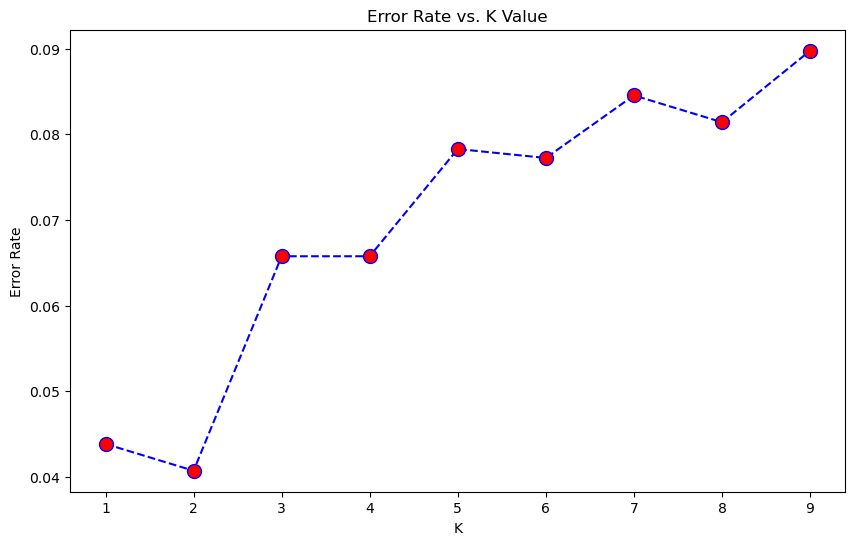

In [29]:
from sklearn import metrics
acc=[]
error_rate = []
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    acc.append(metrics.accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error: ",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)


We find that K=2 produces the lowest error rate of 0.040, and we are validating this by plotting the accuracy against K values and got the best accuracy of 95,9% when K=2

Maximum accuracy:  0.9592901878914405 at K = 2


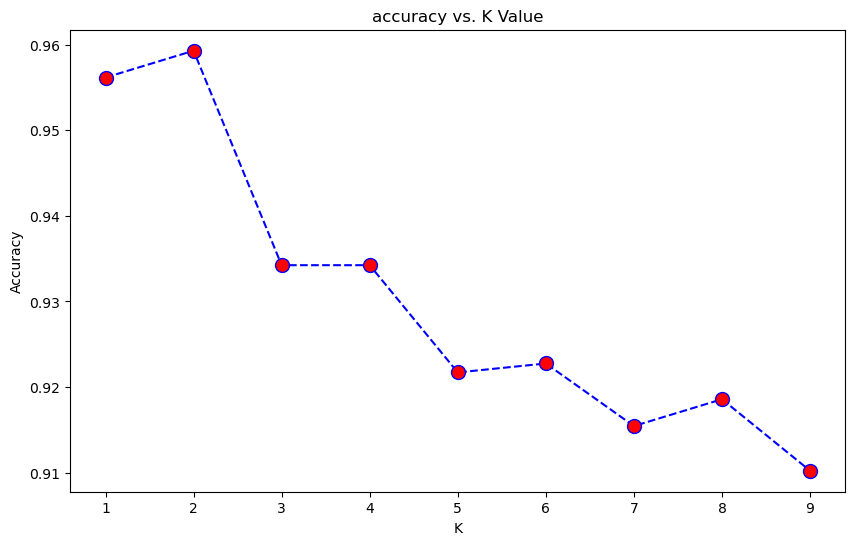

In [30]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10),acc,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy: ",max(acc),"at K =",acc.index(max(acc))+1)

#### Using TF-IDF as a text tokenizer and vectorizer

The goal of using tf-idf is that it not only focuses on the frequency of words present in the corpus as `CountVectorizer`, but also provides the weight of the words. Sklearn.feature_extraction.text.TfidFVectorizer. (n.d.). Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.t


In [31]:
tfidf_vectorizer = TfidfVectorizer(min_df=.01, use_idf =True, stop_words = 'english')
tf_X_vectorized = tfidf_vectorizer.fit_transform(emailText_df['email_text']).toarray()
tf_X_vectorized.shape

(4790, 1324)

In [32]:
X = pd.DataFrame(tf_X_vectorized)
X['email_text'] = emailText_df["email_text"].values
y = emailText_df["IsEmailPhishing"]
X.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,1315,1316,1317,1318,1319,1320,1321,1322,1323,email_text
4074,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.19,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"RE: AA Meetings the Hottest Place to Meet Women With Big Bucks less obscure haiku \n\nbuy a puppy, ro!\nthey are chick magnets. master\nventriloquism.\n\ngg\n\n\n\n-----Original Message-----\nFrom..."
4331,0.00,0.00,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"Actualización de datos de su cuenta de Banamex. Banamex ESTIMADO CLIENTE DE BANAMEX BancaNet se renueva constantemente incluyendo nuevas funcionalidades y servicios, modernizando la operación en s..."
3541,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Unauthorized access to your PayPal account ! PayPal Unauthorized access to your PayPal account! We recently noticed more attempts to log in to your PayPal account from a foreign IP address. If you...
1622,0.00,0.00,0.06,0.13,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"[use Perl] Headlines for 2002-10-08 use Perl Daily Headline Mailer\n\nThis Week on perl5-porters (30 September / 6 October 2002)\n posted by rafael on Monday October 07, @07:12 (summaries)\n ..."
1359,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"New testing packages Hi,\n\nJust the kind of announce I make once in a while :\n- I've rebuilt a new ""alsaplayer"" package based on Angle's one.\n- I've rebuilt a hopefully final version ""-fr8"" of ..."


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=80)
print("There are in total", len(X), "observations, of which", len(X_train), "are now in the train set, and", len(X_test), "in the test set.")

There are in total 4790 observations, of which 3832 are now in the train set, and 958 in the test set.


In [34]:
X_train = X_train.drop(['email_text'], axis=1)
X_email_text = X_test['email_text']
X_test = X_test.drop(['email_text'], axis=1)

In [35]:
k=2
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)
score = model.score(X_test.values, y_test)

print("Accuracy:", score)

Accuracy: 0.8903966597077244


These classification reports shows that we have overfitting in our train data because the model perform well on train data `100%` and and a big difference gat on test data`89%`.

In [36]:
pred = model.predict(X_train.values)
report= classification_report(y_train,pred)
print(report)

pred = model.predict(X_test.values)
report= classification_report(y_test,pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2047
           1       1.00      1.00      1.00      1785

    accuracy                           1.00      3832
   macro avg       1.00      1.00      1.00      3832
weighted avg       1.00      1.00      1.00      3832

              precision    recall  f1-score   support

           0       1.00      0.79      0.88       504
           1       0.81      1.00      0.90       454

    accuracy                           0.89       958
   macro avg       0.91      0.90      0.89       958
weighted avg       0.91      0.89      0.89       958



Let's try to perform hyperparameter tuning by reducing the max_features to 200, which will give use data with shape (4790, 200) 

In [37]:
tfidf_vectorizer = TfidfVectorizer(max_features=200,min_df=.01, use_idf =True, stop_words = 'english')
tf_X_vectorized = tfidf_vectorizer.fit_transform(emailText_df['email_text']).toarray()
tf_X_vectorized.shape

(4790, 200)

Let's add the email text that was removed by the vectorizer

In [38]:
X = pd.DataFrame(tf_X_vectorized)
X['email_text'] = emailText_df["email_text"].values
y = emailText_df["IsEmailPhishing"]

Splitting Train and Test data by 80% train and 20% test data

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=80)
print("There are in total", len(X), "observations, of which", len(X_train), "are now in the train set, and", len(X_test), "in the test set.")

There are in total 4790 observations, of which 3832 are now in the train set, and 958 in the test set.


remove email text from the train and test data for running the model

In [40]:
X_train = X_train.drop(['email_text'], axis=1)
X_email_text = X_test['email_text']
X_test = X_test.drop(['email_text'], axis=1)

In [41]:
k=2
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)
score = model.score(X_test.values, y_test)

print("Accuracy:", score)

Accuracy: 0.9780793319415448


Now the accuracy has increased a lot to 98% which is almost perfect performance. 

In [42]:
pred = model.predict(X_train.values)
report= classification_report(y_train,pred)
print(report)

pred = model.predict(X_test.values)
report= classification_report(y_test,pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2047
           1       1.00      0.99      1.00      1785

    accuracy                           1.00      3832
   macro avg       1.00      1.00      1.00      3832
weighted avg       1.00      1.00      1.00      3832

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       504
           1       0.97      0.99      0.98       454

    accuracy                           0.98       958
   macro avg       0.98      0.98      0.98       958
weighted avg       0.98      0.98      0.98       958



## Evaluation

Creating labels with meaningful names add a column for phishing and safe and also the actual email text in the predictions dataframe 

In [43]:
label_map = {"phishing": 1, "safe": 0}
predictions = pd.DataFrame(pred)
predictions["truth"] = y_test.map(dict((v,k) for k, v in label_map.items())).values
predictions["text"] = X_email_text.values
predictions.sample(10)

,0,truth,text
852,0,safe,"""Cram school"" operator arrested for trying to cram it into a 13\n year old girl URL: http://www.newsisfree.com/click/-2,8417753,1717/\nDate: 2002-10-01T03:29:21+01:00\n\n[IMG: http://www.newsis..."
709,0,safe,Re: K3B checking build system type... i686-pc-linux-gnu\nchecking host system type... i686-pc-linux-gnu\nchecking target system type... Invalid configuration\n`athalon-redhat-linux': machine `atha...
566,0,safe,Re: [SAdev] Live Rule Updates after Release ??? Yes - great minds think alike. But even withput eval rules it would be very \nuseful. It would allow us to respond quickly to spammer's tricks.\n\nT...
269,1,phishing,Regions Bank Corporate Customer Service: Confirm Your Account\n Records! (message id: B34265387720840) []
951,1,phishing,Question about your item -- respond now eBay sent this message to you.Your registered name is included to show this message originated from eBay. Learn more. Question about Item -- Respond Now eBa...
202,1,phishing,Question about Item -- Respond Now []
683,1,phishing,"eBay Change Notice: Item 22183492189 Dear eBay Community Member, A previously entered bid on your item http://cgi.ebay.com/ws/eBayISAPI.dll?ViewItem&item=22183492189 has been retracted or cancelle..."
82,1,phishing,"Your account has been suspended Your account has been suspended Dear member, Your account has been indefinitely suspended from eBay because our records indicate your account was involved in activi..."
126,1,phishing,Question for item #250026510836 - Respond Now Re: Question for item #8812386909 - DELL PRECISION M20 LAPTOP BRAND NEW BOXED!!! NO RESERVE Learn more. Response to Question about Item -- Respond Now...
715,0,safe,[SAdev] [Bug 1053] New: IMG tag based rules http://www.hughes-family.org/bugzilla/show_bug.cgi?id=1053\n\n Summary: IMG tag based rules\n Product: Spamassassin\n Vers...


To be continued ...